In [64]:
import glob
import os
import sys
import warnings

import matplotlib.pyplot as plt
import pandas as pd
from dateutil.relativedelta import relativedelta

warnings.filterwarnings("ignore")

In [65]:
def singleref_cdis(array, multiplier=1):
    cache = [round((record - array[0]), 4) * multiplier for record in array]
    return cache

In [66]:
former_gps_path = (
    r"E:\006_InSAR_Project_2022\GPSDataWorkspace\GPS_ButterworthFilter\Modeled_GPSData_v002"
)

new_gps_path = r"E:\010__SS3_TRY_MY_BEST_TO_SURVIVE_POSTPROCESSING\GPS_Data_until2022_Yaru_Sinica\GPS_DatetimeConverted"

In [67]:
file2process = glob.glob(os.path.join(new_gps_path, "*.csv"))

pd.read_csv(file2process[0], parse_dates=[1])

,Original,Converted,dN(m),dE(m),dU(m),sN(m),sE(m),sU(m)
0,2007.2507,2007-04-02,0.0000,0.0000,0.0000,0.0038,0.0039,0.0177
1,2007.2534,2007-04-03,0.0004,0.0017,-0.0129,0.0025,0.0028,0.0118
2,2007.2562,2007-04-04,-0.0016,0.0009,-0.0052,0.0024,0.0027,0.0115
3,2007.2589,2007-04-05,-0.0023,0.0004,-0.0029,0.0023,0.0026,0.0110
4,2007.2616,2007-04-06,-0.0003,-0.0011,-0.0056,0.0023,0.0026,0.0110
...,...,...,...,...,...,...,...,...
4975,2022.1877,2022-03-10,-0.1074,0.0424,-0.0072,0.0030,0.0033,0.0136
4976,2022.1904,2022-03-11,-0.1083,0.0408,-0.0056,0.0032,0.0036,0.0146
4977,2022.1932,2022-03-12,-0.1086,0.0420,-0.0068,0.0033,0.0036,0.0148
4978,2022.1959,2022-03-13,-0.1103,0.0419,0.0049,0.0034,0.0037,0.0156


In [73]:
savefolder = r"E:\010__SS3_TRY_MY_BEST_TO_SURVIVE_POSTPROCESSING\GPS_Data_until2022_Yaru_Sinica\GPS_DatetimeConverted\FullDatetime"

file2process = glob.glob(os.path.join(new_gps_path, "*.csv"))

for filepath in file2process[:]:
    # ----------------------------------------------------------------------------------------------------
    basename = os.path.basename(filepath)
    filename = basename[:-4].upper()
    gpsdata = pd.read_csv(filepath, parse_dates=[1])
    # ----------------------------------------------------------------------------------------------------
    first_day = gpsdata.loc[0, "Converted"].to_pydatetime()
    last_day = gpsdata.loc[len(gpsdata) - 1, "Converted"].to_pydatetime()
    fulldatetime = pd.date_range(first_day, last_day)
    # ----------------------------------------------------------------------------------------------------
    fulltime_gpsdata = pd.DataFrame(data={"Datetime": fulldatetime})
    fulltime_gpsdata = fulltime_gpsdata.set_index("Datetime")
    # ----------------------------------------------------------------------------------------------------
    gpsdata = gpsdata.set_index("Converted")

    for col in gpsdata.columns[1:-3]:
        fulltime_gpsdata[col] = fulltime_gpsdata.index.map(gpsdata[col])
n
        new_col = col[:-3] + "(mm)"
        fulltime_gpsdata[new_col] = fulltime_gpsdata[col] * 1000

    fulltime_gpsdata = fulltime_gpsdata[fulltime_gpsdata.columns[-3:]]

    fulltime_gpsdata.to_csv(os.path.join(savefolder, filename + ".csv"))

In [3]:
new_gps = pd.read_csv(
    r"E:\010__SS3_TRY_MY_BEST_TO_SURVIVE_POSTPROCESSING\GPS_Data_until2022_Yaru_Sinica\GPS_DatetimeConverted\tkjs.csv",
    parse_dates=[1],
)

old_gps = pd.read_csv(
    r"E:\006_InSAR_Project_2022\GPSDataWorkspace\GPS_ButterworthFilter\Modeled_GPSData\TKJS.csv",
    parse_dates=[0],
)

In [4]:
# ----------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------

first_day = new_gps.loc[0, "Converted"].to_pydatetime()
last_day = new_gps.loc[len(new_gps) - 1, "Converted"].to_pydatetime()

fulldatetime = pd.date_range(first_day, last_day)

# ----------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------

output_gps = pd.DataFrame(data={"Datetime": fulldatetime})

output_gps = output_gps.set_index("Datetime")

# ----------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------

new_gps = new_gps.set_index("Converted")

for col in new_gps.columns:
    output_gps[col] = output_gps.index.map(new_gps[col])

# ----------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------
select_output_gps = output_gps.loc["2016":, ["dN(m)", "dE(m)", "dU(m)"]]

for col in select_output_gps.columns:
    new_col = col[:-3] + "(mm)"
    select_output_gps[new_col] = select_output_gps[col] * 1000

for col in select_output_gps.columns[-3:]:
    new_col = "CDIS_" + col
    select_output_gps[new_col] = singleref_cdis(select_output_gps[col])

In [5]:
old_gps = old_gps.set_index("Datetime")

select_old_gps = old_gps["2016":]

for col in ["dN(mm)", "dE(mm)", "dU(mm)"]:
    new_col = "CDIS_" + col
    select_old_gps[new_col] = singleref_cdis(select_old_gps[col])

In [6]:
select_output_gps.head(3)

,dN(m),dE(m),dU(m),dN(mm),dE(mm),dU(mm),CDIS_dN(mm),CDIS_dE(mm),CDIS_dU(mm)
Datetime,,,,,,,,,
2016-01-01,-0.0949,0.2826,-0.5038,-94.9,282.6,-503.8,0.0,0.0,0.0
2016-01-02,-0.0958,0.2832,-0.4771,-95.8,283.2,-477.1,-0.9,0.6,26.7
2016-01-03,-0.0981,0.2867,-0.4881,-98.1,286.7,-488.1,-3.2,4.1,15.7


In [7]:
select_old_gps.head(3)

,dN(mm),dE(mm),dU(mm),Modeled_dN(mm),Modeled_dE(mm),Modeled_dU(mm),CDIS_dN(mm),CDIS_dE(mm),CDIS_dU(mm)
Datetime,,,,,,,,,
2016-01-01,-24.9139,46.429,-47.5321,-24.167435,47.880400,-44.297150,0.000,0.000,0.000
2016-01-02,-23.8419,47.332,-42.3961,-24.204974,48.013469,-44.127693,1.072,0.903,5.136
2016-01-03,-25.4279,50.505,-37.7441,-24.244071,48.146679,-43.973611,-0.514,4.076,9.788


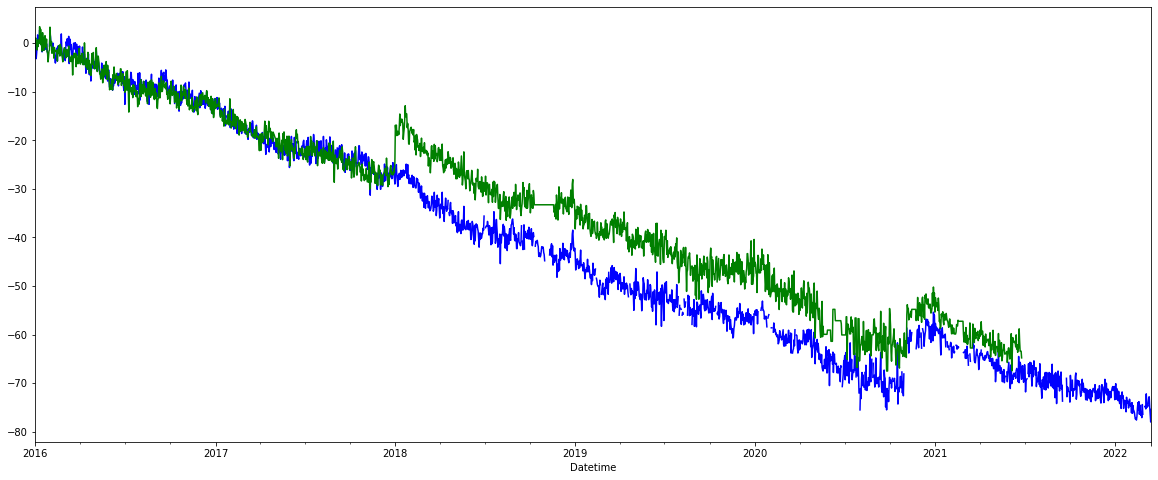

In [12]:
ax = select_output_gps["CDIS_dN(mm)"].plot(color="blue", figsize=(20, 8))

ax.plot(select_old_gps["CDIS_dN(mm)"], color="green")

Index(['CDIS_dN(mm)', 'CDIS_dE(mm)', 'CDIS_dU(mm)'], dtype='object')

'_dU(mm)'

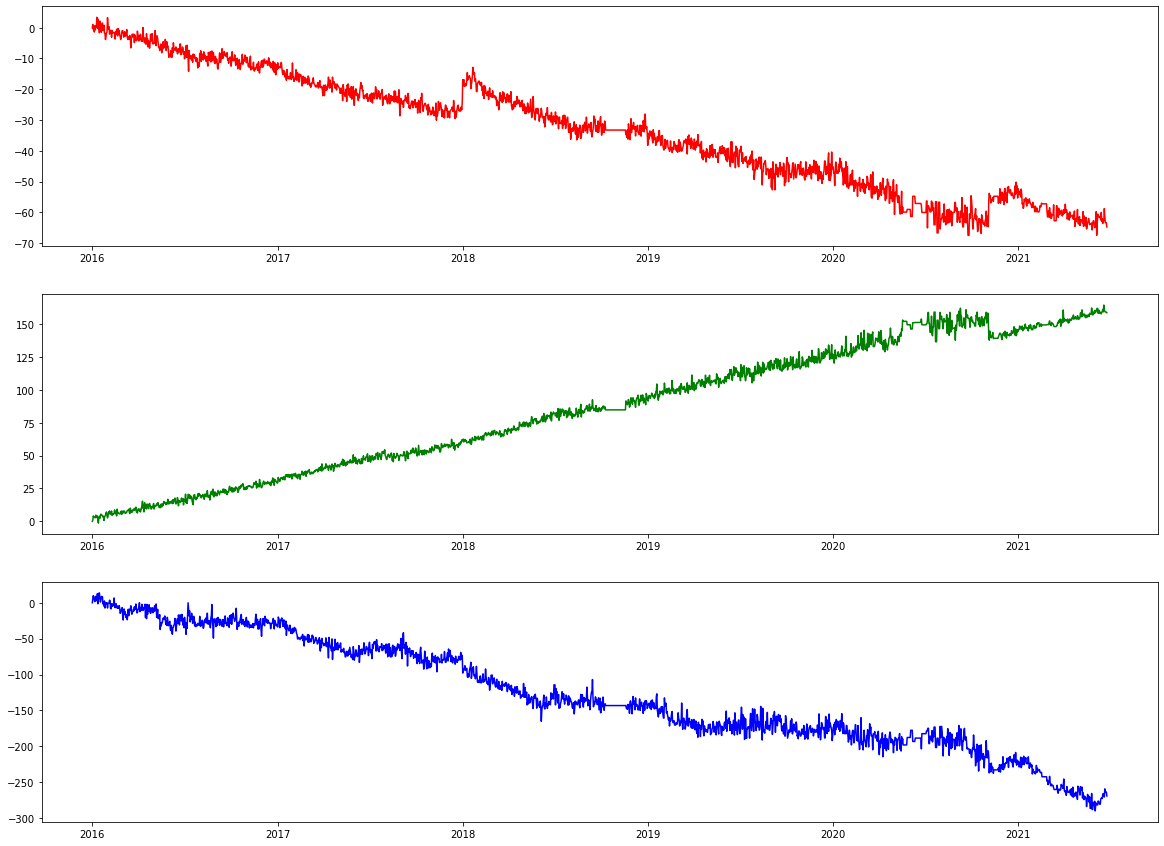

In [36]:
fig = plt.figure(figsize=(20, 15))

for col, axis, color in zip(select_old_gps.columns[-3:], [311, 312, 313], ["red", "green", "blue"]):
    label = col[5:]
    ax = fig.add_subplot(axis)
    ax.plot(select_old_gps[col], color=color)

plt.show()